In [4]:
import pandas as pd

data_summary = pd.read_csv(r'C:/Users/Krishna Rukmini/Downloads/data_summary_table.csv')
data = pd.read_csv(r'C:/Users/Krishna Rukmini/Downloads/cleaned_partition1ExtractedFeatures.csv')

In [170]:
data_summary.head(5)

,Feature Name,Cardinality,Non-null Count,Null Count,Min,25th,Mean,50th,75th,Max,std. Dev,Outlier Count Low,Outlier Count High
0,ABSNJZH_MAX,19441,73492,0,0.440457,8.557318,21.199062,67.697210,2582.482978,69.996277,147.808088,0,1
1,ABSNJZH_MEAN,73492,73492,0,0.051691,3.564015,10.383872,40.706393,2407.069750,49.887861,126.315069,0,1
2,ABSNJZH_MIN,18624,73492,0,0.000000,0.085829,0.903226,15.473042,2171.285567,32.418271,107.832318,0,1
3,ABSNJZH_STDDEV,73492,73492,0,0.105845,1.885450,4.130586,10.368884,284.619436,9.466304,15.243291,0,1
4,ABSNJZH_vARIANCE,73492,73492,0,0.011203,3.554921,17.061739,107.513757,81008.223594,321.965672,1849.193756,0,1


In [171]:
data.head(5)

,ABSNJZH_MAX,ABSNJZH_MEAN,ABSNJZH_MIN,ABSNJZH_STDDEV,ABSNJZH_vARIANCE,EPSZ_MAX,EPSZ_MEAN,EPSZ_MIN,EPSZ_STDDEV,EPSZ_vARIANCE,...,TOTUSJZ_MAX,TOTUSJZ_MEAN,TOTUSJZ_MIN,TOTUSJZ_STDDEV,TOTUSJZ_vARIANCE,USFLUX_MAX,USFLUX_MEAN,USFLUX_MIN,USFLUX_STDDEV,USFLUX_vARIANCE
0,230.569941,197.149772,146.325834,20.275173,411.082643,-0.206070,-0.234130,-0.249767,0.012156,0.000148,...,2.745450e+13,2.447065e+13,2.315281e+13,9.584124e+11,9.185543e+23,1.615692e+22,1.542361e+22,1.461355e+22,4.872250e+20,2.373882e+41
1,227.180304,193.005053,146.325834,20.366661,414.800884,-0.204199,-0.231168,-0.249767,0.013764,0.000189,...,2.745450e+13,2.464652e+13,2.315281e+13,1.100685e+12,1.211508e+24,1.615692e+22,1.532642e+22,1.461355e+22,4.870239e+20,2.371923e+41
2,227.180304,189.519124,146.325834,20.317258,412.790983,-0.200462,-0.227292,-0.243612,0.014933,0.000223,...,2.745450e+13,2.483293e+13,2.315281e+13,1.136146e+12,1.290828e+24,1.615692e+22,1.522402e+22,1.429395e+22,5.256412e+20,2.762986e+41
3,224.280325,186.412603,146.325834,18.182739,330.611986,-0.193560,-0.223545,-0.243470,0.016569,0.000275,...,2.745450e+13,2.496009e+13,2.315281e+13,1.137724e+12,1.294416e+24,1.615692e+22,1.510787e+22,1.408501e+22,5.867886e+20,3.443209e+41
4,224.280325,184.846237,146.325834,16.655084,277.391818,-0.193151,-0.219781,-0.243470,0.017361,0.000301,...,2.745450e+13,2.508328e+13,2.315281e+13,1.098116e+12,1.205858e+24,1.615692e+22,1.499020e+22,1.407693e+22,6.290183e+20,3.956641e+41


In [168]:
def get_features_with_large_range(summary_table):
    # Complete this function to answer the question.
    index_del = []
    index_del_Outlier = summary_table.loc[(summary_table['Outlier Count Low'] + summary_table['Outlier Count High']) > ((summary_table['Null Count']+summary_table['Non-null Count'])/ 10)].index 
    index_del_range = summary_table.loc[(summary_table['Max'] - summary_table['Min']) > 10000].index 
    for ind in index_del_range:
        if (ind in index_del_Outlier):
            index_del.append(summary_table["Feature Name"][ind])
    return index_del
    

In [169]:
# Call the get_features_with_large_range function here
get_features_with_large_range(data_summary)

[]

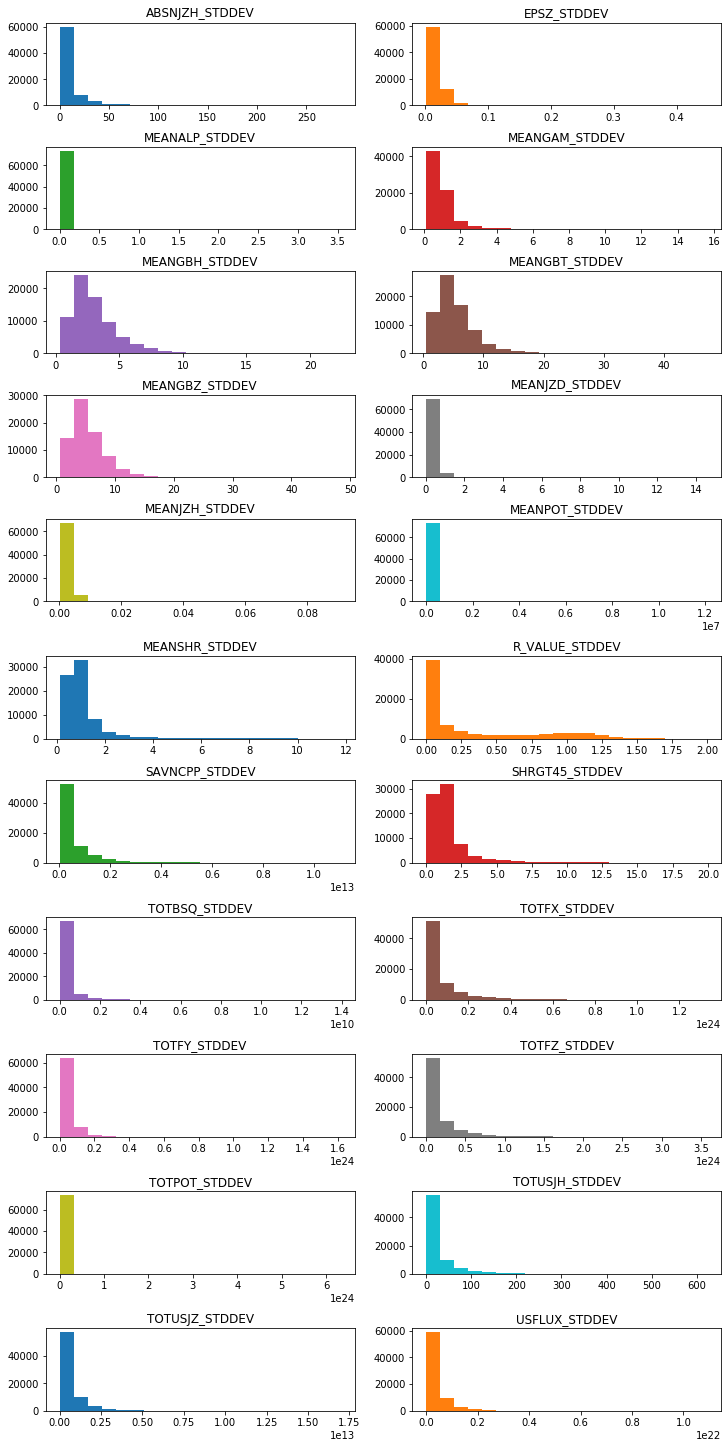

In [110]:
import matplotlib.pyplot as plt

features_to_look_at = ['ABSNJZH_STDDEV','EPSZ_STDDEV','MEANALP_STDDEV',
                       'MEANGAM_STDDEV','MEANGBH_STDDEV','MEANGBT_STDDEV',
                       'MEANGBZ_STDDEV','MEANJZD_STDDEV','MEANJZH_STDDEV',
                       'MEANPOT_STDDEV','MEANSHR_STDDEV','R_VALUE_STDDEV',
                       'SAVNCPP_STDDEV','SHRGT45_STDDEV','TOTBSQ_STDDEV',
                       'TOTFX_STDDEV','TOTFY_STDDEV','TOTFZ_STDDEV','TOTPOT_STDDEV',
                       'TOTUSJH_STDDEV','TOTUSJZ_STDDEV','USFLUX_STDDEV']
colors = plt.rcParams["axes.prop_cycle"]()
rows = 11
cols = 2
attr = 0
fig,axs = plt.subplots(rows,cols,figsize=(10,20),constrained_layout=True)
#fig.tight_layout()
for row in range(rows):
    for col in range(cols):
        c = next(colors)["color"]
        axs[row,col].hist(data[features_to_look_at[attr]],bins = 20,color=c)
        axs[row,col].set_title(features_to_look_at[attr])
        attr = attr +1

In [173]:
import numpy as np

def clamp_to_third_quartile(data) -> None:
    for ftr in features_to_look_at:
        Q1 = np.percentile(data[ftr],25)
        Q3 = np.percentile(data[ftr],75)
        IQR = Q3 - Q1
        check = Q3+(1.5*IQR)
        for val in data[ftr]:
            if (val > check):
                data[ftr].replace(to_replace = val, value = check,inplace = True)
    
    # Complete this function to answer the question.

In [112]:
# Call the clamp_to_third_quartile function here
features_to_look_at = ['TOTUSJH_STDDEV','TOTUSJZ_STDDEV','USFLUX_STDDEV']
max_outlier_df = data[features_to_look_at]
clamp_to_third_quartile(max_outlier_df)

C:\Users\Krishna Rukmini\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


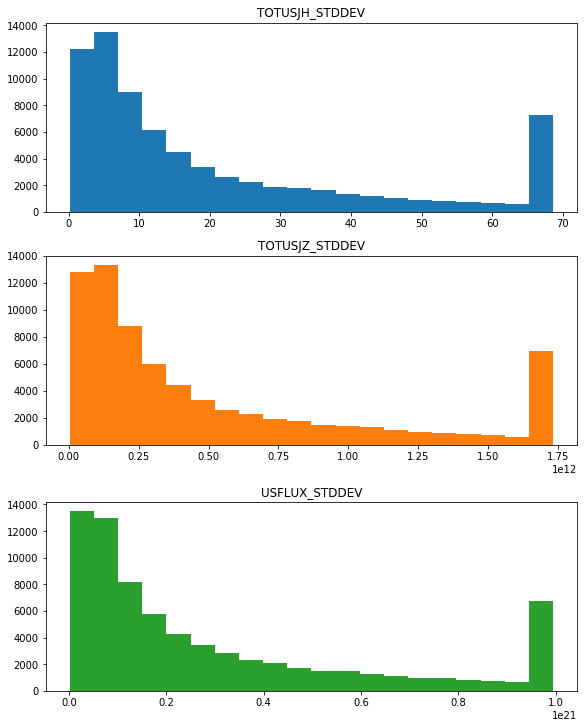

In [121]:
features_to_look_at = ['TOTUSJH_STDDEV','TOTUSJZ_STDDEV','USFLUX_STDDEV']
colors = plt.rcParams["axes.prop_cycle"]()
fig,axs = plt.subplots(3,figsize=(8,10),constrained_layout=True)
#fig.tight_layout()
for n,val in enumerate(features_to_look_at):
    c = next(colors)["color"]
    axs[n].hist(max_outlier_df[val],bins = 20,color=c)
    axs[n].set_title(val)
        


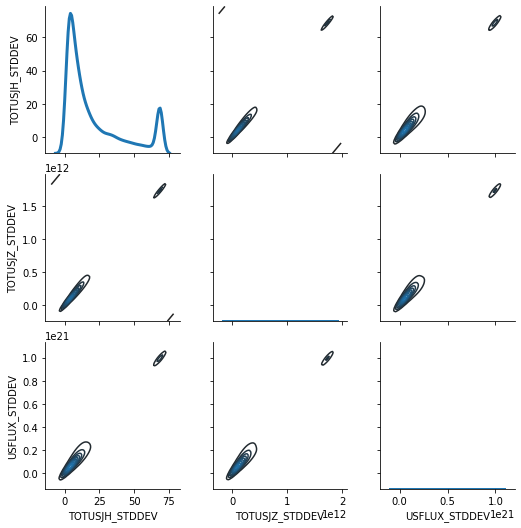

In [165]:
g = sns.PairGrid(max_outlier_df)
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 3, legend = False);
plt.show()

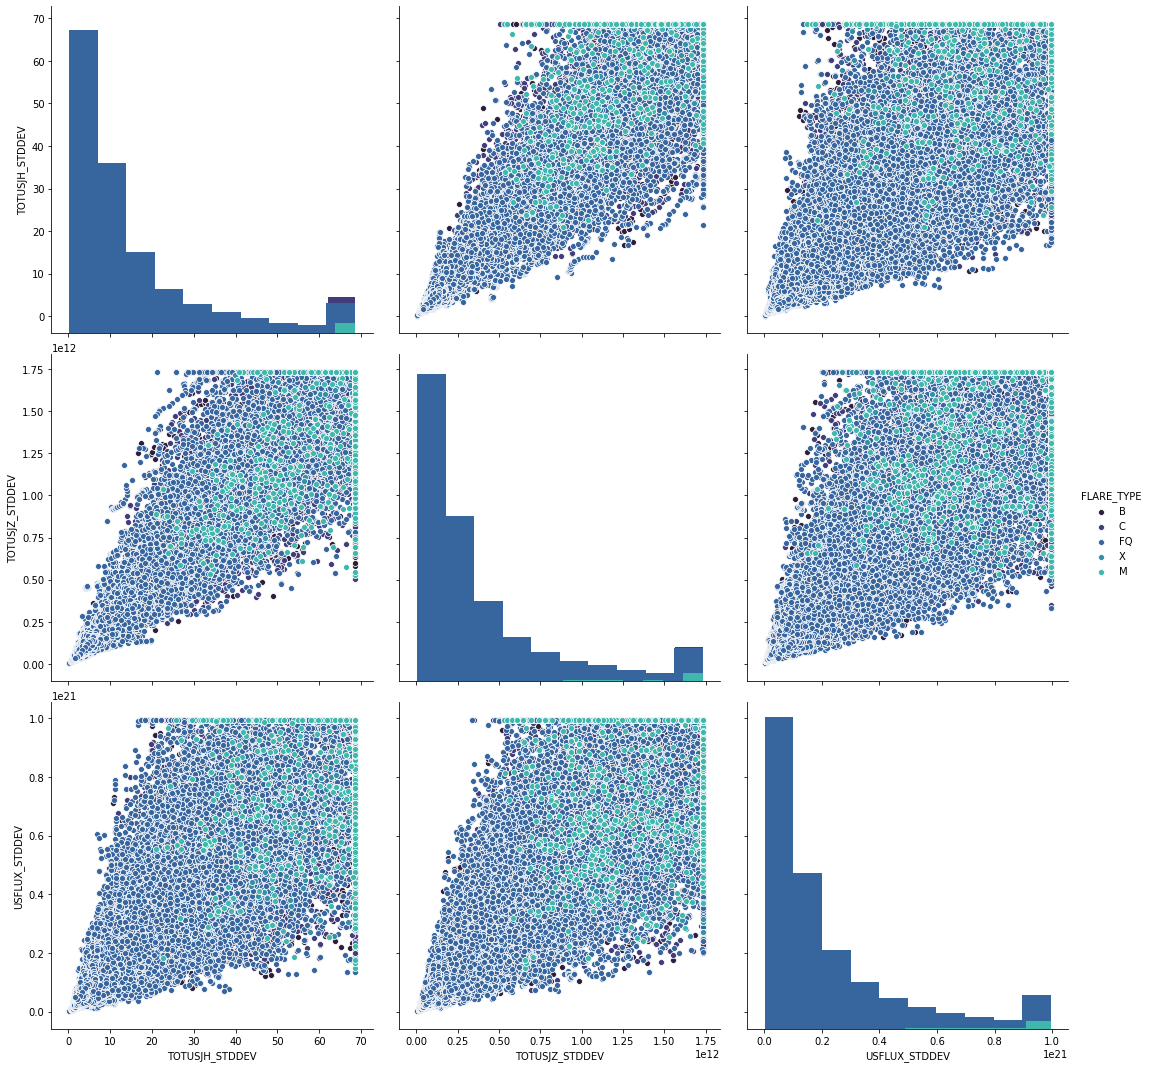

In [162]:
# Plot the features here
import seaborn as sns

#max_outlier_df = max_outlier_df.join(data['FLARE_TYPE'])
sns.pairplot(max_outlier_df,hue='FLARE_TYPE',diag_kind='hist', height = 5, hue_order= ['B','C','FQ','X','M'], 
             palette = sns.color_palette('mako')) 